In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def exp(x, precision = 10e-100):
  S = 0
  q = np.eye(*x.shape, dtype = x.dtype)
  i = 1
  while True:
    S += q
    q = q@x/i
    i+=1
    if np.sum(q**2) < precision**2:
      return S

def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n - 1)

def combinations(n, k):
  if k < 0 or k > n:
    return 0
  else:
    return factorial(n) // (factorial(k) * factorial(n - k))

def coofs(x, P, depth):
    dirs = [x]
    coeffs = [x]  # Коэффициенты ряда (производные / factorial)
    for n in range(1, depth):  # Начинаем с 1, т.к. dirs[0] = x
        dx_dt = np.zeros_like(x)
        for k in range(n):
            binom_coeff = factorial(n - 1) // (factorial(k) * factorial(n - 1 - k))
            dx_dt += binom_coeff * P(dirs[k], dirs[n - 1 - k])
        dirs.append(dx_dt)
        coeffs.append(dx_dt / factorial(n))  # Добавляем коэффициент
    return coeffs  # Возвращаем именно коэффициенты!

def non_linear_solver(x, P, t, depth, C = None):
    if C is None:
        C = coofs(x, P, depth)
    return sum(c*t**n for n, c in enumerate(C))

In [ ]:
def ln(t, depth = 10, x0 = 1.0, C = None):
    def ln_p1(a, b):
        x, y, z, b = a[0], a[1], a[2], a[3]
        dx_dt = y*b
        dy_dt = (2*z*y-x*b)
        dz_dt = 2*y*x
        db_dt = 0
        return np.array([dx_dt, dy_dt, dz_dt, db_dt], dtype = a.dtype)
    x0 = x0
    y0 = 1/x0
    z0 = x0**2
    b0 = 1
    x = np.array([x0, y0, z0, b0], dtype = np.float64)
    return non_linear_solver(x, P = ln_p1, t = t, depth = depth, C = C)

def ln_p(a, b):
    x, y, z, b = a[0], a[1], a[2], a[3]
    dx_dt = y*b
    dy_dt = -y*z
    dz_dt = 2*z**2
    db_dt = 0
    return np.array([dx_dt, dy_dt, dz_dt, db_dt], dtype = a.dtype)

def ln2(t, depth = 10, x0 = 1.0, C = None):
    x0 = 1
    y0 = 11
    z0 = 1
    b0 = 1
    x = np.array([x0, y0, z0, b0], dtype = np.float64)
    return non_linear_solver(x, P = ln_p, t = t, depth = depth, C = C)

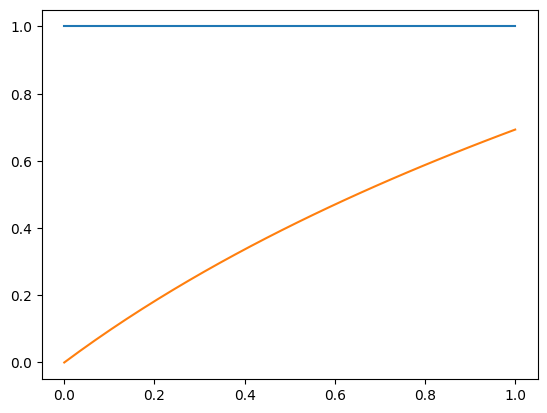

In [156]:
T = np.linspace(0, 1, 30)
plt.plot(T, [ln2(t, 10)[0] for t in T])
plt.plot(T, np.log(1 + T))
plt.show()

In [41]:
np.log(1)

np.float64(0.0)

In [52]:
q = np.array([1, 2, 3], dtype = np.float64)

sum(j*q for j in range(10))

array([ 45.,  90., 135.])

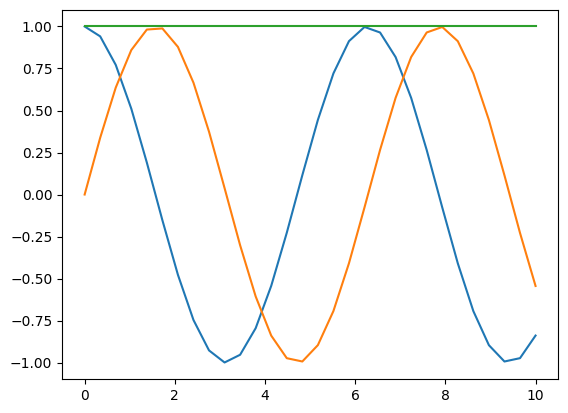

In [ ]:
import numpy as np
from math import factorial

def calculate_derivative(x, W, derivatives):
    n = len(derivatives) - 1
    dx_dt = np.zeros_like(x)
    for k in range(n + 1):
        binom_coeff = factorial(n) // (factorial(k) * factorial(n - k))
        dx_dt += binom_coeff * np.einsum("j,ijk,k->i", derivatives[k], W, derivatives[n - k])
    return dx_dt

def taylor_series_coefficients(x_0, W, n_terms):
    derivatives = [x_0]  
    coefficients = [x_0]  
    for i in range(1, n_terms):
        dx_dt = calculate_derivative(x_0, W, derivatives)
        derivatives.append(dx_dt)
        coefficients.append(dx_dt / factorial(i))
    return coefficients

def taylor_series_solution(t, x_0, coefficients):
    x_t = np.zeros_like(x_0)
    for i, coeff in enumerate(coefficients):
        x_t += coeff * (t ** i)
    return x_t


x_start = np.array([1.0, 0.0, 1.0])
W = np.array([
    [[0, 0, 0], [0, 0, -1], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [1, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
])
n_terms = 100

coefficients = taylor_series_coefficients(x_start, W, n_terms)
T = np.linspace(0, 10, 30)
plt.plot(T, [taylor_series_solution(t, x_start, coefficients) for t in T])
plt.show()